In [97]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
#import graphviz 
#from sklearn import tree
#import sklearn as sk
from sklearn import svm
#from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.utils.multiclass import unique_labels
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_predict
#from sklearn import datasets, linear_model
#from sklearn.metrics import mean_squared_error, r2_score
#import statsmodels.api as sm
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelBinarizer

In [53]:
def confusion_matrix_report(y_true, y_pred):    
    cm, labels = confusion_matrix(y_true, y_pred), unique_labels(y_true, y_pred)
    column_width = max([len(str(x)) for x in labels] + [5])  # 5 is value length
    report = " " * column_width + " " + "{:_^{}}".format("Prediction", column_width * len(labels))+ "\n"
    report += " " * column_width + " ".join(["{:>{}}".format(label, column_width) for label in labels]) + "\n"
    for i, label1 in enumerate(labels):
        report += "{:>{}}".format(label1, column_width) + " ".join(["{:{}d}".format(cm[i, j], column_width) for j in range(len(labels))]) + "\n"
    return report

In [54]:
white = pd.read_csv("data/winequality-white1.csv")
red = pd.read_csv("data/winequality-red1.csv")

In [55]:
conditions = [(white['quality'] <= 4),
              (white['quality'] >= 8)]
choices = ['1 - low', '3 - high']
white['quality class'] = np.select(conditions, choices, default = '2 - middle')

In [56]:
conditions = [(red['quality'] <= 4),
              (red['quality'] >= 8)]
choices = ['1 - low', '3 - high']
red['quality class'] = np.select(conditions, choices, default = '2 - middle')

In [57]:
white_data = white.drop(['quality', 'quality class'], axis = 1)
red_data = red.drop(['quality', 'quality class'], axis = 1)

In [49]:
white_0_1 = pd.DataFrame()
for column in white:
    if (column != 'quality') & (column != 'quality class'):
        minimum = white[column].min()
        maximum = white[column].max()
        white_0_1[column + "_Normalized"] = (white[column]-minimum)/(maximum-minimum)
white_0_1['quality'] = white['quality']

In [117]:
white['type'] = "red"
red['type'] = "white"
white_red = pd.concat([white, red], ignore_index=True)
white_red_target = white_red['type']
lb = LabelBinarizer()
white_red_target = np.array([number[0] for number in lb.fit_transform(white_red_target)])
white = white.drop(['type'], axis = 1)
red = red.drop(['type'], axis = 1)
white_red_data = white_red.drop(['type', 'quality class'], axis = 1)

In [118]:
print(white_red_target)

[0 0 0 ... 1 1 1]


In [50]:
white_0_1_data = white_0_1.drop(['quality'], axis = 1)

# Preprocessing etc.

In [4]:
white.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality class
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,2 - middle
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,2 - middle
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,2 - middle
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,2 - middle
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,2 - middle


In [4]:
white.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [11]:
np.correlate(white['residual sugar'], white['quality'])

array([181862.4])

In [15]:
np.corrcoef([white['fixed acidity'], white['volatile acidity'], white['citric acid'], white['residual sugar'], white['quality']])

array([[ 1.        , -0.02269729,  0.2891807 ,  0.0890207 , -0.11366283],
       [-0.02269729,  1.        , -0.14947181,  0.06428606, -0.19472297],
       [ 0.2891807 , -0.14947181,  1.        ,  0.09421162, -0.00920909],
       [ 0.0890207 ,  0.06428606,  0.09421162,  1.        , -0.09757683],
       [-0.11366283, -0.19472297, -0.00920909, -0.09757683,  1.        ]])

In [16]:
white.groupby(['quality']).count()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
quality,,,,,,,,,,,
3,20,20,20,20,20,20,20,20,20,20,20
4,163,163,163,163,163,163,163,163,163,163,163
5,1457,1457,1457,1457,1457,1457,1457,1457,1457,1457,1457
6,2198,2198,2198,2198,2198,2198,2198,2198,2198,2198,2198
7,880,880,880,880,880,880,880,880,880,880,880
8,175,175,175,175,175,175,175,175,175,175,175
9,5,5,5,5,5,5,5,5,5,5,5


## Plotting

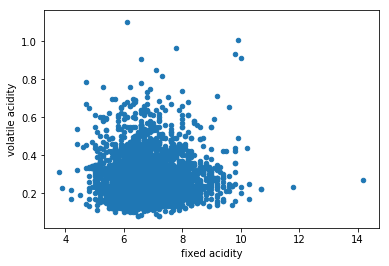

In [25]:
white.plot(kind='scatter', x='fixed acidity', y='volatile acidity')
plt.show()

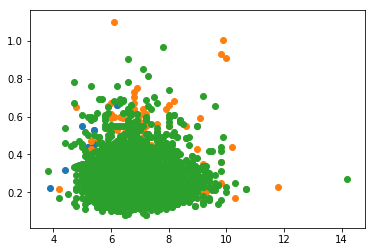

In [26]:
for name, group in white.groupby('quality class'):
    plt.scatter(group['fixed acidity'], group['volatile acidity'], label=name)

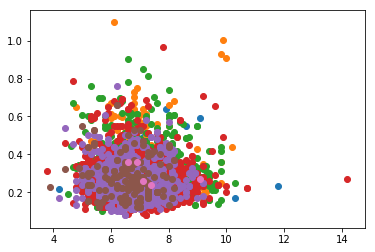

In [27]:
for name, group in white.groupby('quality'):
    plt.scatter(group['fixed acidity'], group['volatile acidity'], label=name)

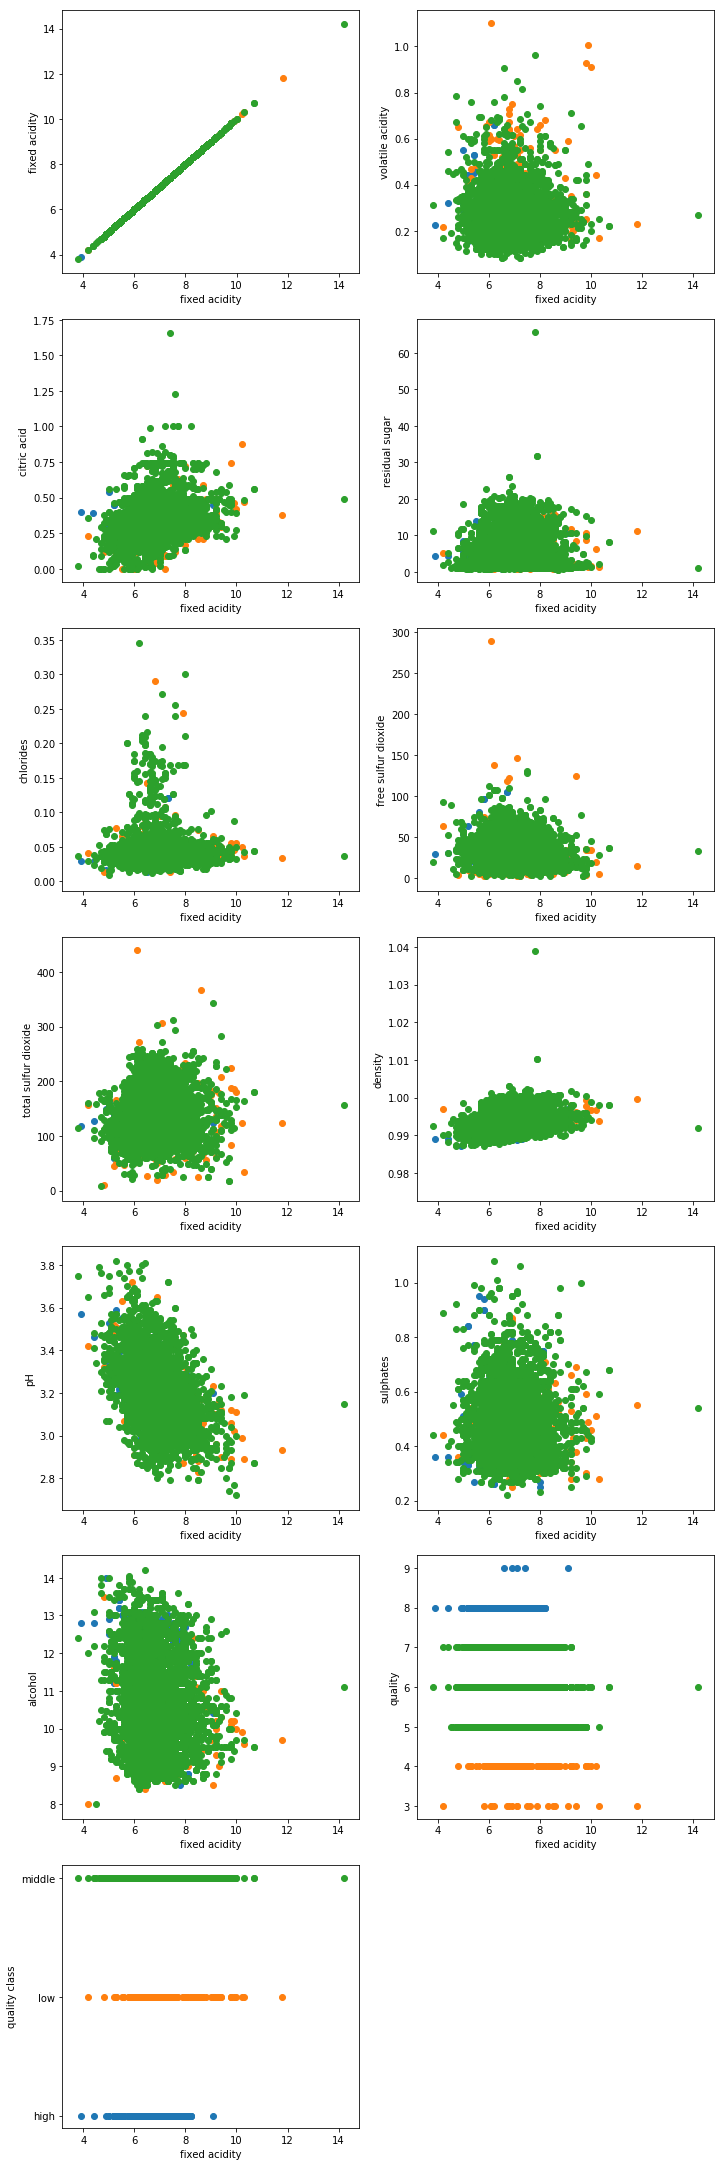

In [35]:
plt.figure(5, (10,30))
i = 1
for column in white:    
    plt.subplot(7,2,i)
    i += 1
    plt.tight_layout()
    plt.xlabel('fixed acidity')
    plt.ylabel(column)
    for name, group in white.groupby('quality class'):
        plt.scatter(group['fixed acidity'], group[column], label=name)
plt.show()

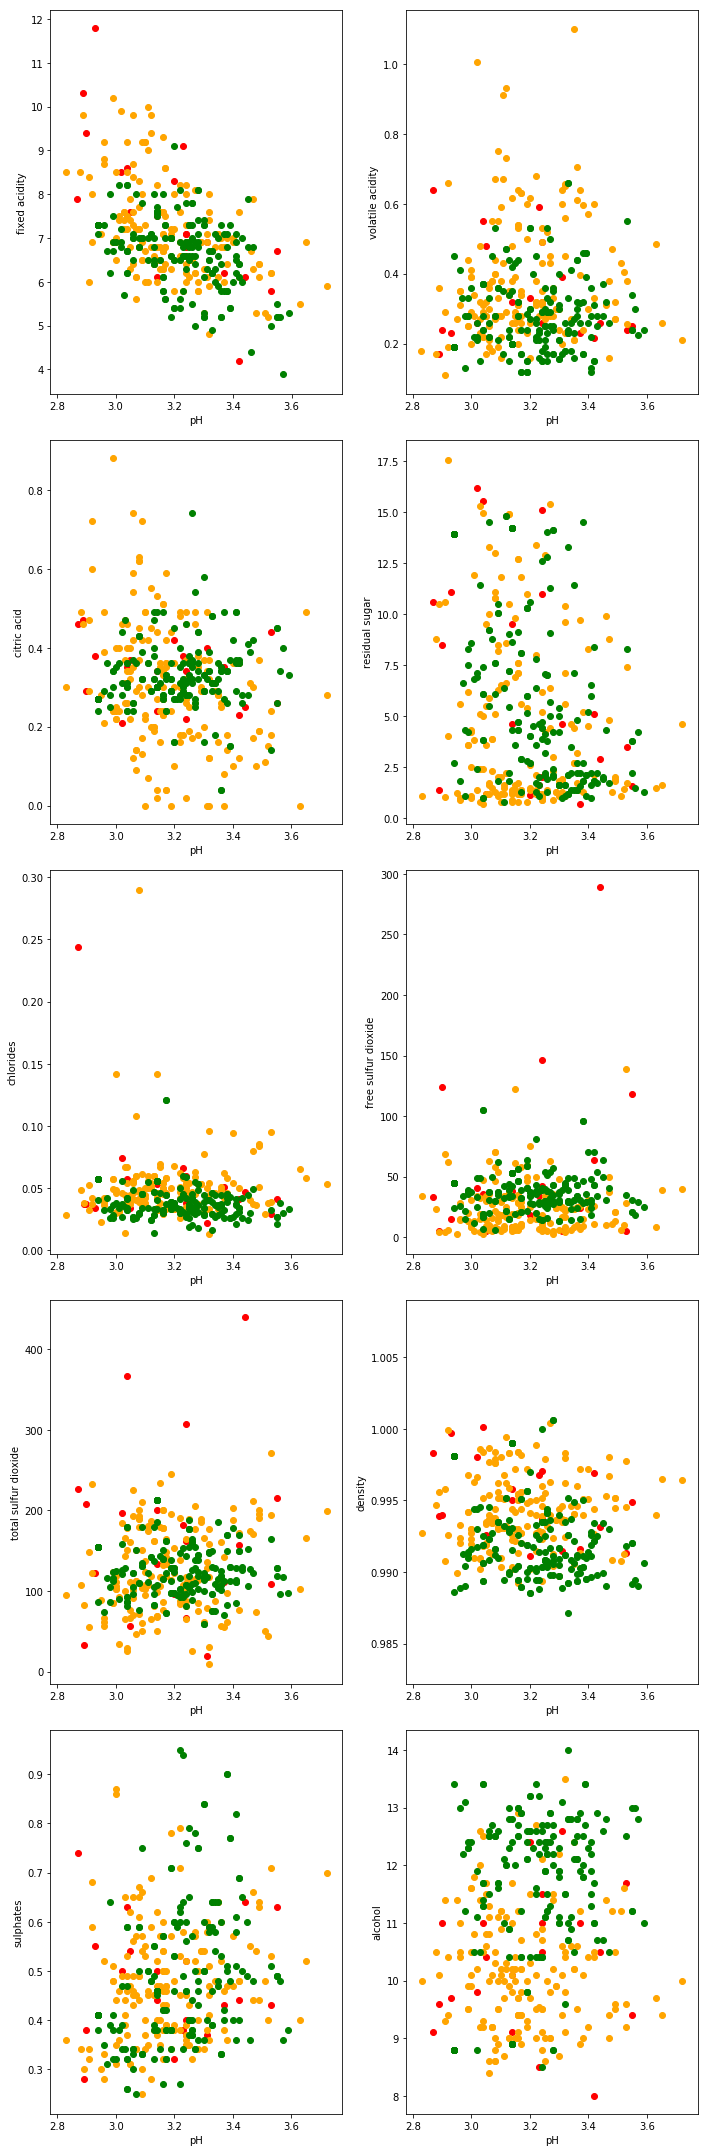

In [32]:
plt.figure(8, (10,30))
i = 1
mainColumn = 'pH'
for column in white:
    if (column != 'quality') & (column != 'quality class') & (column != mainColumn):
        plt.subplot(5,2,i)
        i += 1
        plt.tight_layout()
        plt.xlabel(mainColumn)
        plt.ylabel(column)
        for name, group in white.groupby('quality'):
            if name == 3:
                color = 'red'
            elif name == 4:
                color = 'orange'
            elif name == 5:
                color = 'goldenrod'
            elif name == 6:
                color = 'yellow'
            elif name == 7:
                color = 'yellowgreen'
            else:
                color = 'green'
            if (name not in range(5,8)):
                plt.scatter(group[mainColumn], group[column], c=color, label=name)
plt.show()

#### Binning & Encoding

In [62]:
numBins = 3
standardLabel = ['low', 'middle','high']
white_binned = pd.DataFrame(dict(
    FixedAcidity = pd.cut(white['fixed acidity'], bins=numBins, labels=standardLabel),
    VolatileAcidity = pd.cut(white['volatile acidity'], bins=numBins, labels=standardLabel),
    CitricAcid = pd.cut(white['citric acid'], bins=numBins, labels=standardLabel),
    ResidualSugar = pd.cut(white['residual sugar'], bins=numBins, labels=standardLabel),
    Chlorides = pd.cut(white['chlorides'], bins=numBins, labels=standardLabel),
    FreeSulfurDioxide = pd.cut(white['free sulfur dioxide'], bins=numBins, labels=standardLabel),
    TotalSulfurDioxide = pd.cut(white['total sulfur dioxide'], bins=numBins, labels=standardLabel),
    Density = pd.cut(white['density'], bins=numBins, labels=standardLabel),
    pH = pd.cut(white['pH'], bins=numBins, labels=standardLabel),
    Sulphates = pd.cut(white['sulphates'], bins=numBins, labels=standardLabel),
    Alcohol = pd.cut(white['alcohol'], bins=numBins, labels=standardLabel),
    ))
white_binned_and_encoded = pd.get_dummies(white_binned)

In [63]:
white_binned_and_encoded.head()

,FixedAcidity_low,FixedAcidity_middle,FixedAcidity_high,VolatileAcidity_low,VolatileAcidity_middle,VolatileAcidity_high,CitricAcid_low,CitricAcid_middle,CitricAcid_high,ResidualSugar_low,...,Density_high,pH_low,pH_middle,pH_high,Sulphates_low,Sulphates_middle,Sulphates_high,Alcohol_low,Alcohol_middle,Alcohol_high
0,1,0,0,1,0,0,1,0,0,1,...,0,1,0,0,1,0,0,1,0,0
1,1,0,0,1,0,0,1,0,0,1,...,0,0,1,0,1,0,0,1,0,0
2,0,1,0,1,0,0,1,0,0,1,...,0,0,1,0,1,0,0,0,1,0
3,1,0,0,1,0,0,1,0,0,1,...,0,0,1,0,1,0,0,1,0,0
4,1,0,0,1,0,0,1,0,0,1,...,0,0,1,0,1,0,0,1,0,0


### Decision Tree

In [46]:
decision_tree = tree.DecisionTreeClassifier(max_depth=5, min_samples_split=10)
decision_tree.fit(white_data, white['quality class'])

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=10,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [47]:
dot_data = tree.export_graphviz(decision_tree,
                         feature_names=white_data.columns.values,
                         class_names=unique_labels(white['quality class']),  
                         filled=True, rounded=True,special_characters=True,out_file=None)
#graphviz.Source(dot_data)

In [48]:
white_middle = white_2[white_2['quality_class'] == 'middle']

In [49]:
white_middle.groupby('quality_class').mean()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
quality_class,,,,,,,,,,,,
middle,6.848633,0.274308,0.335499,6.485072,0.045887,35.605733,139.183903,0.994087,3.187158,0.490573,10.482895,5.872767


In [50]:
white_middle = white_middle.drop(['quality_class'], axis = 1)

In [51]:
conditions = [(white_middle['quality'] <= 5),
              (white_middle['quality'] >= 7)]
choices = ['1 - low', '3 - high']
white_middle['quality_class'] = np.select(conditions, choices, default = '2 - middle')
white_middle.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_class
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,2 - middle
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,2 - middle
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,2 - middle
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,2 - middle
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,2 - middle


In [52]:
white_data_middle = white_middle.drop(['quality', 'quality_class'], axis = 1)
#white_data_middle.drop(['quality', 'quality_class'], axis = 1)
white_middle.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_class
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,2 - middle
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,2 - middle
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,2 - middle
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,2 - middle
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,2 - middle


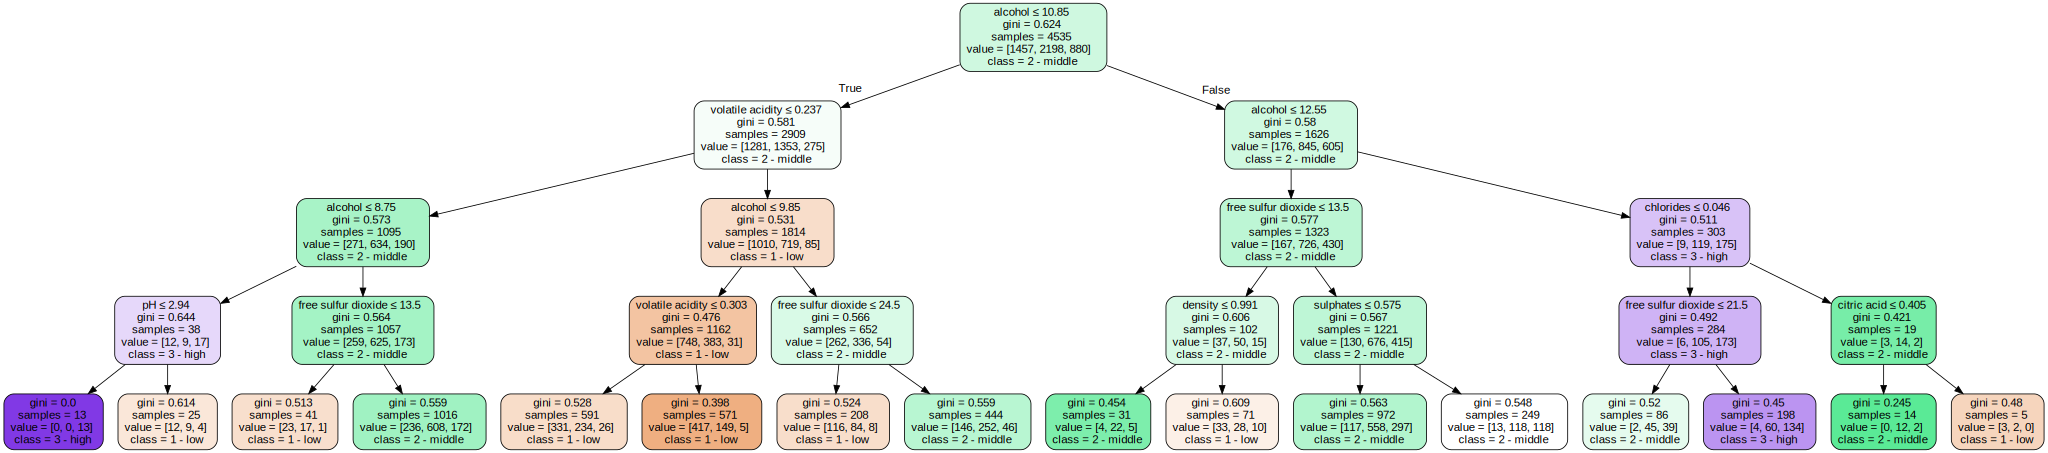

In [53]:
decision_tree = tree.DecisionTreeClassifier(max_depth=4, min_samples_split=10)
decision_tree.fit(white_data_middle, white_middle['quality_class'])
dot_data = tree.export_graphviz(decision_tree,
                         feature_names=white_data_middle.columns.values,
                         class_names=unique_labels(white_middle['quality_class']),  
                         filled=True, rounded=True,special_characters=True,out_file=None)
graphviz.Source(dot_data)

In [55]:
### Dieser Decision Tree sieht überaus Kacke aus... Testen muss ich das Model nicht mal mehr, da
### es komplett kacke ist, selbst für die Train Daten, weiß auch jetzt wieso

### Support Vector Machines

##### RBF

In [28]:
clf = svm.SVC(C=0.3, gamma=0.01, cache_size=5000,
              decision_function_shape='ovo', class_weight='balanced')
              #class_weight={'1 - low':50, '3 - high':50})

In [29]:
white_target = white['quality']
data_train, data_test, target_train, target_test = train_test_split(
    white_data, white_target,test_size=0.2, random_state=12, stratify=white_target)

In [30]:
clf.fit(data_train, target_train)

SVC(C=0.3, cache_size=5000, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovo', degree=3, gamma=0.01, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [31]:
predictions = clf.predict(data_test)

In [33]:
print(accuracy_score(target_test, predictions))
print(confusion_matrix_report(target_test, predictions))
print(classification_report(target_test, predictions))
mse = ((target_test-predictions)^2).mean() #How to make it so that it only calculates for 3,4,8 & 9?
print("MSE: ")
print(mse)

0.2857142857142857
      ____________Prediction_____________
         3     4     5     6     7     8     9
    3    0     2     1     0     1     0     0
    4    1    20     7     2     1     1     1
    5    8    56   135    25    36    24     7
    6   10    68   140    45   108    51    18
    7    5    15    34     5    64    50     3
    8    0     3     9     1     4    16     2
    9    0     1     0     0     0     0     0

             precision    recall  f1-score   support

          3       0.00      0.00      0.00         4
          4       0.12      0.61      0.20        33
          5       0.41      0.46      0.44       291
          6       0.58      0.10      0.17       440
          7       0.30      0.36      0.33       176
          8       0.11      0.46      0.18        35
          9       0.00      0.00      0.00         1

avg / total       0.44      0.29      0.28       980

MSE: 
0.25


##### Polynomial

In [16]:
clf_poly = svm.SVC(kernel='poly', degree=4, C=0.3, gamma=0.01, cache_size=5000,
              decision_function_shape='ovo', class_weight='balanced')
              #class_weight={'1 - low':50, '3 - high':50})

In [24]:
white_target = white['quality']
data_train_poly, data_test_poly, target_train_poly, target_test_poly = train_test_split(
    white_0_1_data, white_target,test_size=0.2, random_state=8, stratify=white_target)

In [25]:
clf_poly.fit(data_train_poly, target_train_poly)

SVC(C=0.3, cache_size=5000, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovo', degree=3, gamma=0.01, kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [26]:
predictions = clf_poly.predict(data_test_poly)

In [27]:
print(accuracy_score(target_test_poly, predictions))
print(confusion_matrix_report(target_test_poly, predictions))
print(classification_report(target_test_poly, predictions))
mse = ((target_test_poly-predictions)^2).mean() #How to make it so that it only calculates for 3,4,8 & 9?
print("MSE: ")
print(mse)

0.03571428571428571
      ____________Prediction_____________
         3     4     5     6     7     8     9
    3    0     0     0     0     0     4     0
    4    0     0     0     0     0    33     0
    5    0     0     0     0     0   291     0
    6    0     0     0     0     0   440     0
    7    0     0     0     0     0   176     0
    8    0     0     0     0     0    35     0
    9    0     0     0     0     0     1     0

             precision    recall  f1-score   support

          3       0.00      0.00      0.00         4
          4       0.00      0.00      0.00        33
          5       0.00      0.00      0.00       291
          6       0.00      0.00      0.00       440
          7       0.00      0.00      0.00       176
          8       0.04      1.00      0.07        35
          9       0.00      0.00      0.00         1

avg / total       0.00      0.04      0.00       980

MSE: 
-2.6530612244897958


C:\Users\Tido\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


##### Regression

In [92]:
clf_reg = svm.SVR(C=0.3, gamma=0.01, cache_size=5000)

In [93]:
clf_reg.fit(data_train, target_train)

SVR(C=0.3, cache_size=5000, coef0=0.0, degree=3, epsilon=0.1, gamma=0.01,
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [94]:
predictions_reg = clf_reg.predict(data_test)

In [113]:
mse_reg = ((target_test-predictions_reg)*(target_test-predictions_reg)).mean() #How to make it so that it only calculates for 3,4,8 & 9?
print(mse_reg)

0.624436935851546


In [ ]:
### Have I by this also already automatically done Support Vector Regression
### or do I need to specify this explicitly (well I think so, as I also
### have not yet done this for quality instead of quality classes)

#### Using Cross Validation

##### RBF

In [23]:
cross_val = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [37]:
predicted = cross_val_predict(clf, white_data, white['quality'], cv=cross_val)

In [35]:
print(confusion_matrix_report(white['quality'], predicted))
print(accuracy_score(white['quality'], predicted))
print(classification_report(white['quality'], predicted))
mse = ((white['quality']-predicted)^2).mean() #How to make it so that it only calculates for 3,4,8 & 9?
print("MSE:")
print(mse)

NameError: name 'predicted' is not defined

###### Grid Search

In [39]:
clf = svm.SVC(gamma=0.001,
              decision_function_shape='ovo', class_weight='balanced')

In [40]:
parameters = {'C': np.arange(0.1, 2, 0.1)}

In [43]:
grid_search_estimator = GridSearchCV(clf, 
                                     parameters, scoring='accuracy', cv=cross_val)

In [44]:
grid_search_estimator.fit(white_data,white['quality'])

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
       error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovo', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3,
       1.4, 1.5, 1.6, 1.7, 1.8, 1.9])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [45]:
print("best score is {} with params {}".format(grid_search_estimator.best_score_, grid_search_estimator.best_params_))

results = grid_search_estimator.cv_results_

for i in range(len(results['params'])):
    print("{}, {}".format(results['params'][i], results['mean_test_score'][i]))

best score is 0.2833809718252348 with params {'C': 1.9000000000000001}
{'C': 0.1}, 0.16966108615761535
{'C': 0.2}, 0.1847692935892201
{'C': 0.30000000000000004}, 0.19844834626378113
{'C': 0.4}, 0.2088607594936709
{'C': 0.5}, 0.21702735810534912
{'C': 0.6}, 0.22396896692527563
{'C': 0.7000000000000001}, 0.22927725602286647
{'C': 0.8}, 0.2374438546345447
{'C': 0.9}, 0.24071049407921602
{'C': 1.0}, 0.2523478971008575
{'C': 1.1}, 0.2535728868926092
{'C': 1.2000000000000002}, 0.2560228664761127
{'C': 1.3000000000000003}, 0.2605144957125357
{'C': 1.4000000000000001}, 0.263781135157207
{'C': 1.5000000000000002}, 0.2680685994283381
{'C': 1.6}, 0.27194773376888526
{'C': 1.7000000000000002}, 0.277868517762352
{'C': 1.8000000000000003}, 0.27950183748468765
{'C': 1.9000000000000001}, 0.2833809718252348


##### Polynomial

In [17]:
predicted_poly = cross_val_predict(clf_poly, white_0_1_data, white['quality'], cv=cross_val)

In [18]:
print(confusion_matrix_report(white['quality'], predicted_poly))
print(accuracy_score(white['quality'], predicted_poly))
print(classification_report(white['quality'], predicted_poly))
mse = ((white['quality']-predicted_poly)^2).mean() #How to make it so that it only calculates for 3,4,8 & 9?
print("MSE:")
print(mse)

      ____________Prediction_____________
         3     4     5     6     7     8     9
    3    3     0     8     5     0     4     0
    4   23     0    66    41     0    33     0
    5  246     0   584   336     0   291     0
    6  253     0   880   625     0   440     0
    7   42     0   352   310     0   176     0
    8    7     0    70    63     0    35     0
    9    1     0     2     1     0     1     0

0.254593711719069
             precision    recall  f1-score   support

          3       0.01      0.15      0.01        20
          4       0.00      0.00      0.00       163
          5       0.30      0.40      0.34      1457
          6       0.45      0.28      0.35      2198
          7       0.00      0.00      0.00       880
          8       0.04      0.20      0.06       175
          9       0.00      0.00      0.00         5

avg / total       0.29      0.25      0.26      4898

MSE:
0.5506329113924051


C:\Users\Tido\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


##### Regression

In [101]:
cross_val = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
predicted_reg = cross_val_predict(clf_reg, white_data, white['quality'], cv=cross_val)

In [102]:
mse = ((white['quality']-predicted_reg)^2).mean() #How to make it so that it only calculates for 3,4,8 & 9?
print(mse)

TypeError: cannot compare a dtyped [float64] array with a scalar of type [bool]

### Gaussian Naive Bayes

In [87]:
white_target = white['quality class']
data_train, data_test, target_train, target_test = train_test_split(
    white_data, white_target,test_size=0.2, random_state=42, stratify=white_target)

In [88]:
white_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9


In [89]:
white_target.head()

0    2 - middle
1    2 - middle
2    2 - middle
3    2 - middle
4    2 - middle
Name: quality class, dtype: object

#### Using Train Test Split

In [90]:
naive_bayes = GaussianNB()
naive_bayes.fit(data_train, target_train)

GaussianNB(priors=None)

In [91]:
predictions = naive_bayes.predict(data_test)

In [93]:
print(confusion_matrix_report(target_test, predictions))
print(accuracy_score(target_test, predictions))
print(classification_report(target_test, predictions))

           __________Prediction__________
             1 - low 2 - middle   3 - high
   1 - low         7         28          2
2 - middle        21        851         35
  3 - high         0         27          9

0.8846938775510204
             precision    recall  f1-score   support

    1 - low       0.25      0.19      0.22        37
 2 - middle       0.94      0.94      0.94       907
   3 - high       0.20      0.25      0.22        36

avg / total       0.89      0.88      0.89       980



#### Using Cross Validation

In [98]:
cross_val = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
predicted = cross_val_predict(naive_bayes, white_data, white['quality class'], cv=10)

In [99]:
print(confusion_matrix_report(white['quality class'], predicted))
print(accuracy_score(white['quality class'], predicted))
print(classification_report(white['quality class'], predicted))

           __________Prediction__________
             1 - low 2 - middle   3 - high
   1 - low        51        131          1
2 - middle       162       4145        228
  3 - high         4        146         30

0.8628011433238056
             precision    recall  f1-score   support

    1 - low       0.24      0.28      0.26       183
 2 - middle       0.94      0.91      0.93      4535
   3 - high       0.12      0.17      0.14       180

avg / total       0.88      0.86      0.87      4898



In [101]:
### Using just simple gaussian naive bayes we do not receive a satisfying
### result. Unbalanced classes lead to unacceptable results for low
### and high quality white wines

In [102]:
import numpy as np

In [103]:
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

all_test_target = []
all_test_predition = []
for train_indices, test_indices in cv.split(white_data.values, white['quality class']):
    
    train_indices = np.append(train_indices, (white['quality class']!='2 - middle').nonzero()[0])
    
    train_data = white_data.values[train_indices]
    train_target = white_target[train_indices]
    
    naive_bayes.fit(train_data, train_target)

    test_data = white_data.values[test_indices]
    test_target = white_target[test_indices]
    all_test_target.extend(test_target)
    
    test_prediction = naive_bayes.predict(test_data)
    all_test_predition.extend(test_prediction)
    
print("Gaussian Naive Bayes with accuracy of {}".format(accuracy_score(all_test_target, all_test_predition)))
print(confusion_matrix_report(all_test_target, all_test_predition))
print(classification_report(all_test_target, all_test_predition))

Gaussian Naive Bayes with accuracy of 0.8133932217231523
           __________Prediction__________
             1 - low 2 - middle   3 - high
   1 - low        60        117          6
2 - middle       199       3861        475
  3 - high         2        115         63

             precision    recall  f1-score   support

    1 - low       0.23      0.33      0.27       183
 2 - middle       0.94      0.85      0.89      4535
   3 - high       0.12      0.35      0.17       180

avg / total       0.89      0.81      0.85      4898



In [104]:
### Recall improves slightly for low and doubles for high, meaning
### that this is a way that we can improve the outcome. Nevertheless
### performance remains at an unacceptable level

### Feature Engineering and Clustering

In [4]:
white_extended = white

In [5]:
white_extended['relation_acid_sugar'] = white_extended['fixed acidity']/white_extended['residual sugar']

In [6]:
white_extended.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality class,relation_acid_sugar
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,2 - middle,0.338164
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,2 - middle,3.937500
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,2 - middle,1.173913
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,2 - middle,0.847059
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,2 - middle,0.847059


In [7]:
white_extended_2 = white

In [29]:
Deviation_from_Mean = pd.DataFrame()
for column in white_extended_2:
    if (column != 'quality') & (column != 'quality class'):
        average = white_extended_2[column].mean()
        std = white_extended_2[column].std()
        Deviation_from_Mean[column + "_Deviation"] = (white_extended_2[column]-average)/std
Deviation_from_Mean['quality'] = white['quality']
Deviation_from_Mean.head()

,fixed acidity_Deviation,volatile acidity_Deviation,citric acid_Deviation,residual sugar_Deviation,chlorides_Deviation,free sulfur dioxide_Deviation,total sulfur dioxide_Deviation,density_Deviation,pH_Deviation,sulphates_Deviation,alcohol_Deviation,relation_acid_sugar_Deviation,quality
0,0.172079,-0.081762,0.213258,2.821061,-0.035351,0.569873,0.744489,2.331274,-1.246794,-0.349149,-1.393010,-0.958830,6
1,-0.657434,0.215874,0.047996,-0.944669,0.147732,-1.252891,-0.149669,-0.009153,0.739953,0.001342,-0.824192,0.775523,6
2,1.475600,0.017450,0.543783,0.100272,0.193503,-0.312109,-0.973236,0.358628,0.475053,-0.436771,-0.336633,-0.556121,6
3,0.409083,-0.478608,-0.117266,0.415726,0.559670,0.687471,1.120977,0.525802,0.011479,-0.787262,-0.499152,-0.713617,6
4,0.409083,-0.478608,-0.117266,0.415726,0.559670,0.687471,1.120977,0.525802,0.011479,-0.787262,-0.499152,-0.713617,6


In [30]:
Deviation_from_Mean.describe()

,fixed acidity_Deviation,volatile acidity_Deviation,citric acid_Deviation,residual sugar_Deviation,chlorides_Deviation,free sulfur dioxide_Deviation,total sulfur dioxide_Deviation,density_Deviation,pH_Deviation,sulphates_Deviation,alcohol_Deviation,relation_acid_sugar_Deviation,quality
count,4.898000e+03,4.898000e+03,4.898000e+03,4.898000e+03,4.898000e+03,4.898000e+03,4.898000e+03,4.898000e+03,4.898000e+03,4.898000e+03,4.898000e+03,4.898000e+03,4898.000000
mean,2.653755e-14,-1.053431e-14,5.344610e-14,-2.538326e-15,-1.419036e-15,6.210721e-18,-1.387439e-16,2.148461e-12,1.316599e-14,-1.280696e-14,-2.846868e-14,-1.081028e-15,5.877909
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.885639
min,-3.619982e+00,-1.966784e+00,-2.761461e+00,-1.141827e+00,-1.683102e+00,-1.958477e+00,-3.043919e+00,-2.312802e+00,-3.101091e+00,-2.364468e+00,-2.043089e+00,-1.064656e+00,3.000000
25%,-6.574340e-01,-6.770318e-01,-5.304215e-01,-9.249530e-01,-4.472890e-01,-7.237012e-01,-7.144009e-01,-7.706280e-01,-6.507699e-01,-6.996389e-01,-8.241915e-01,-7.786522e-01,5.000000
50%,-6.492444e-02,-1.809733e-01,-1.172660e-01,-2.348977e-01,-1.268931e-01,-7.691388e-02,-1.026084e-01,-9.608339e-02,-5.474574e-02,-1.739035e-01,-9.285319e-02,-5.128788e-01,6.000000
75%,5.275851e-01,4.142970e-01,4.611517e-01,6.917479e-01,1.935028e-01,6.286722e-01,6.738976e-01,6.929749e-01,6.075033e-01,5.270772e-01,7.197450e-01,7.597484e-01,6.000000
max,8.704217e+00,8.152811e+00,1.095530e+01,1.171292e+01,1.374167e+01,1.491679e+01,7.097720e+00,1.502976e+01,4.183648e+00,5.171074e+00,2.995020e+00,5.865102e+00,9.000000


In [31]:
wcorr = Deviation_from_Mean.corr()
wcorr.style.background_gradient().set_precision(1)

,fixed acidity_Deviation,volatile acidity_Deviation,citric acid_Deviation,residual sugar_Deviation,chlorides_Deviation,free sulfur dioxide_Deviation,total sulfur dioxide_Deviation,density_Deviation,pH_Deviation,sulphates_Deviation,alcohol_Deviation,relation_acid_sugar_Deviation,quality
fixed acidity_Deviation,1,-0.02,0.3,0.09,0.02,-0.05,0.09,0.3,-0.4,-0.02,-0.1,0.1,-0.1
volatile acidity_Deviation,-0.02,1,-0.1,0.06,0.07,-0.1,0.09,0.03,-0.03,-0.04,0.07,-0.1,-0.2
citric acid_Deviation,0.3,-0.1,1,0.09,0.1,0.09,0.1,0.1,-0.2,0.06,-0.08,0.01,-0.009
residual sugar_Deviation,0.09,0.06,0.09,1,0.09,0.3,0.4,0.8,-0.2,-0.03,-0.5,-0.8,-0.1
chlorides_Deviation,0.02,0.07,0.1,0.09,1,0.1,0.2,0.3,-0.09,0.02,-0.4,-0.05,-0.2
free sulfur dioxide_Deviation,-0.05,-0.1,0.09,0.3,0.1,1,0.6,0.3,-0.0006,0.06,-0.3,-0.3,0.008
total sulfur dioxide_Deviation,0.09,0.09,0.1,0.4,0.2,0.6,1,0.5,0.002,0.1,-0.4,-0.4,-0.2
density_Deviation,0.3,0.03,0.1,0.8,0.3,0.3,0.5,1,-0.09,0.07,-0.8,-0.6,-0.3
pH_Deviation,-0.4,-0.03,-0.2,-0.2,-0.09,-0.0006,0.002,-0.09,1,0.2,0.1,0.05,0.1
sulphates_Deviation,-0.02,-0.04,0.06,-0.03,0.02,0.06,0.1,0.07,0.2,1,-0.02,-0.0007,0.05


In [20]:
wcorr2 = white.corr()
wcorr2.style.background_gradient().set_precision(1)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,relation_acid_sugar
fixed acidity,1,-0.02,0.3,0.09,0.02,-0.05,0.09,0.3,-0.4,-0.02,-0.1,-0.1,0.1
volatile acidity,-0.02,1,-0.1,0.06,0.07,-0.1,0.09,0.03,-0.03,-0.04,0.07,-0.2,-0.1
citric acid,0.3,-0.1,1,0.09,0.1,0.09,0.1,0.1,-0.2,0.06,-0.08,-0.009,0.01
residual sugar,0.09,0.06,0.09,1,0.09,0.3,0.4,0.8,-0.2,-0.03,-0.5,-0.1,-0.8
chlorides,0.02,0.07,0.1,0.09,1,0.1,0.2,0.3,-0.09,0.02,-0.4,-0.2,-0.05
free sulfur dioxide,-0.05,-0.1,0.09,0.3,0.1,1,0.6,0.3,-0.0006,0.06,-0.3,0.008,-0.3
total sulfur dioxide,0.09,0.09,0.1,0.4,0.2,0.6,1,0.5,0.002,0.1,-0.4,-0.2,-0.4
density,0.3,0.03,0.1,0.8,0.3,0.3,0.5,1,-0.09,0.07,-0.8,-0.3,-0.6
pH,-0.4,-0.03,-0.2,-0.2,-0.09,-0.0006,0.002,-0.09,1,0.2,0.1,0.1,0.05
sulphates,-0.02,-0.04,0.06,-0.03,0.02,0.06,0.1,0.07,0.2,1,-0.02,0.05,-0.0007


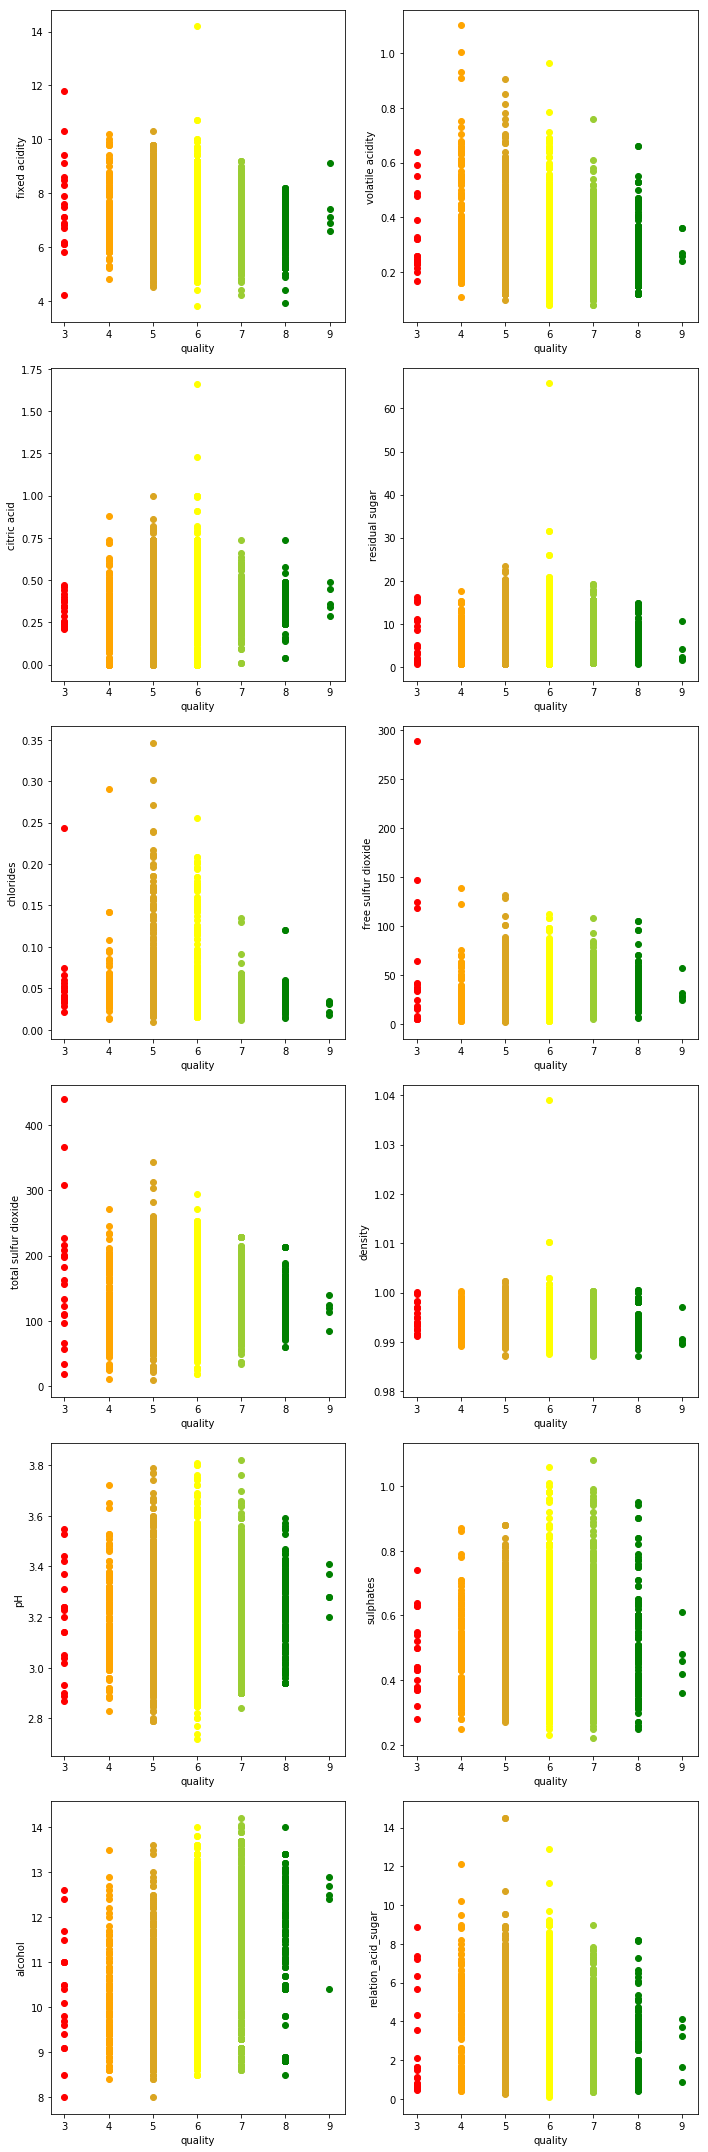

In [27]:
plt.figure(8, (10,30))
i = 1
mainColumn = 'quality'
for column in white:
    if (column != 'quality') & (column != 'quality class') & (column != mainColumn):
        plt.subplot(6,2,i)
        i += 1
        plt.tight_layout()
        plt.xlabel(mainColumn)
        plt.ylabel(column)
        for name, group in white.groupby('quality'):
            if name == 3:
                color = 'red'
            elif name == 4:
                color = 'orange'
            elif name == 5:
                color = 'goldenrod'
            elif name == 6:
                color = 'yellow'
            elif name == 7:
                color = 'yellowgreen'
            else:
                color = 'green'
            plt.scatter(group[mainColumn], group[column], c=color, label=name)
plt.show()

In [28]:
### No clear relationship between the range of the values for any attribute and the quality
### can be found (at least for single attributes)

In [32]:
Normalized_to_0_1 = pd.DataFrame()
for column in white_extended_2:
    if (column != 'quality') & (column != 'quality class'):
        minimum = white_extended_2[column].min()
        maximum = white_extended_2[column].max()
        Normalized_to_0_1[column + "_Normalized"] = (white_extended_2[column]-minimum)/(maximum-minimum)
Normalized_to_0_1['quality'] = white['quality']
Normalized_to_0_1.head()

,fixed acidity_Normalized,volatile acidity_Normalized,citric acid_Normalized,residual sugar_Normalized,chlorides_Normalized,free sulfur dioxide_Normalized,total sulfur dioxide_Normalized,density_Normalized,pH_Normalized,sulphates_Normalized,alcohol_Normalized,relation_acid_sugar_Normalized,quality
0,0.307692,0.186275,0.216867,0.308282,0.106825,0.149826,0.373550,0.267785,0.254545,0.267442,0.129032,0.015271,6
1,0.240385,0.215686,0.204819,0.015337,0.118694,0.041812,0.285383,0.132832,0.527273,0.313953,0.241935,0.265547,6
2,0.413462,0.196078,0.240964,0.096626,0.121662,0.097561,0.204176,0.154039,0.490909,0.255814,0.338710,0.073384,6
3,0.326923,0.147059,0.192771,0.121166,0.145401,0.156794,0.410673,0.163678,0.427273,0.209302,0.306452,0.050657,6
4,0.326923,0.147059,0.192771,0.121166,0.145401,0.156794,0.410673,0.163678,0.427273,0.209302,0.306452,0.050657,6


In [33]:
Normalized_to_0_1.describe()

,fixed acidity_Normalized,volatile acidity_Normalized,citric acid_Normalized,residual sugar_Normalized,chlorides_Normalized,free sulfur dioxide_Normalized,total sulfur dioxide_Normalized,density_Normalized,pH_Normalized,sulphates_Normalized,alcohol_Normalized,relation_acid_sugar_Normalized,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,0.293730,0.194354,0.201320,0.088825,0.109117,0.116056,0.300141,0.133360,0.425697,0.313775,0.405527,0.153635,5.877909
std,0.081141,0.098818,0.072903,0.077792,0.064831,0.059258,0.098603,0.057662,0.137273,0.132704,0.198487,0.144305,0.885639
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
25%,0.240385,0.127451,0.162651,0.016871,0.080119,0.073171,0.229698,0.088924,0.336364,0.220930,0.241935,0.041272,5.000000
50%,0.288462,0.176471,0.192771,0.070552,0.100890,0.111498,0.290023,0.127820,0.418182,0.290698,0.387097,0.079624,6.000000
75%,0.336538,0.235294,0.234940,0.142638,0.121662,0.153310,0.366589,0.173318,0.509091,0.383721,0.548387,0.263271,6.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,9.000000


In [34]:
Normalized_to_0_1['Relation_Density_alc_sugar'] = (Normalized_to_0_1['density_Normalized']*Normalized_to_0_1['alcohol_Normalized'])/Normalized_to_0_1['residual sugar_Normalized']

In [35]:
wcorr2 = Normalized_to_0_1.corr()
wcorr2.style.background_gradient().set_precision(1)

,fixed acidity_Normalized,volatile acidity_Normalized,citric acid_Normalized,residual sugar_Normalized,chlorides_Normalized,free sulfur dioxide_Normalized,total sulfur dioxide_Normalized,density_Normalized,pH_Normalized,sulphates_Normalized,alcohol_Normalized,relation_acid_sugar_Normalized,quality,Relation_Density_alc_sugar
fixed acidity_Normalized,1,-0.02,0.3,0.09,0.02,-0.05,0.09,0.3,-0.4,-0.02,-0.1,0.1,-0.1,0.05
volatile acidity_Normalized,-0.02,1,-0.1,0.06,0.07,-0.1,0.09,0.03,-0.03,-0.04,0.07,-0.1,-0.2,-0.1
citric acid_Normalized,0.3,-0.1,1,0.09,0.1,0.09,0.1,0.1,-0.2,0.06,-0.08,0.01,-0.009,0.006
residual sugar_Normalized,0.09,0.06,0.09,1,0.09,0.3,0.4,0.8,-0.2,-0.03,-0.5,-0.8,-0.1,-0.6
chlorides_Normalized,0.02,0.07,0.1,0.09,1,0.1,0.2,0.3,-0.09,0.02,-0.4,-0.05,-0.2,-0.09
free sulfur dioxide_Normalized,-0.05,-0.1,0.09,0.3,0.1,1,0.6,0.3,-0.0006,0.06,-0.3,-0.3,0.008,-0.3
total sulfur dioxide_Normalized,0.09,0.09,0.1,0.4,0.2,0.6,1,0.5,0.002,0.1,-0.4,-0.4,-0.2,-0.3
density_Normalized,0.3,0.03,0.1,0.8,0.3,0.3,0.5,1,-0.09,0.07,-0.8,-0.6,-0.3,-0.5
pH_Normalized,-0.4,-0.03,-0.2,-0.2,-0.09,-0.0006,0.002,-0.09,1,0.2,0.1,0.05,0.1,0.1
sulphates_Normalized,-0.02,-0.04,0.06,-0.03,0.02,0.06,0.1,0.07,0.2,1,-0.02,-0.0007,0.05,0.01


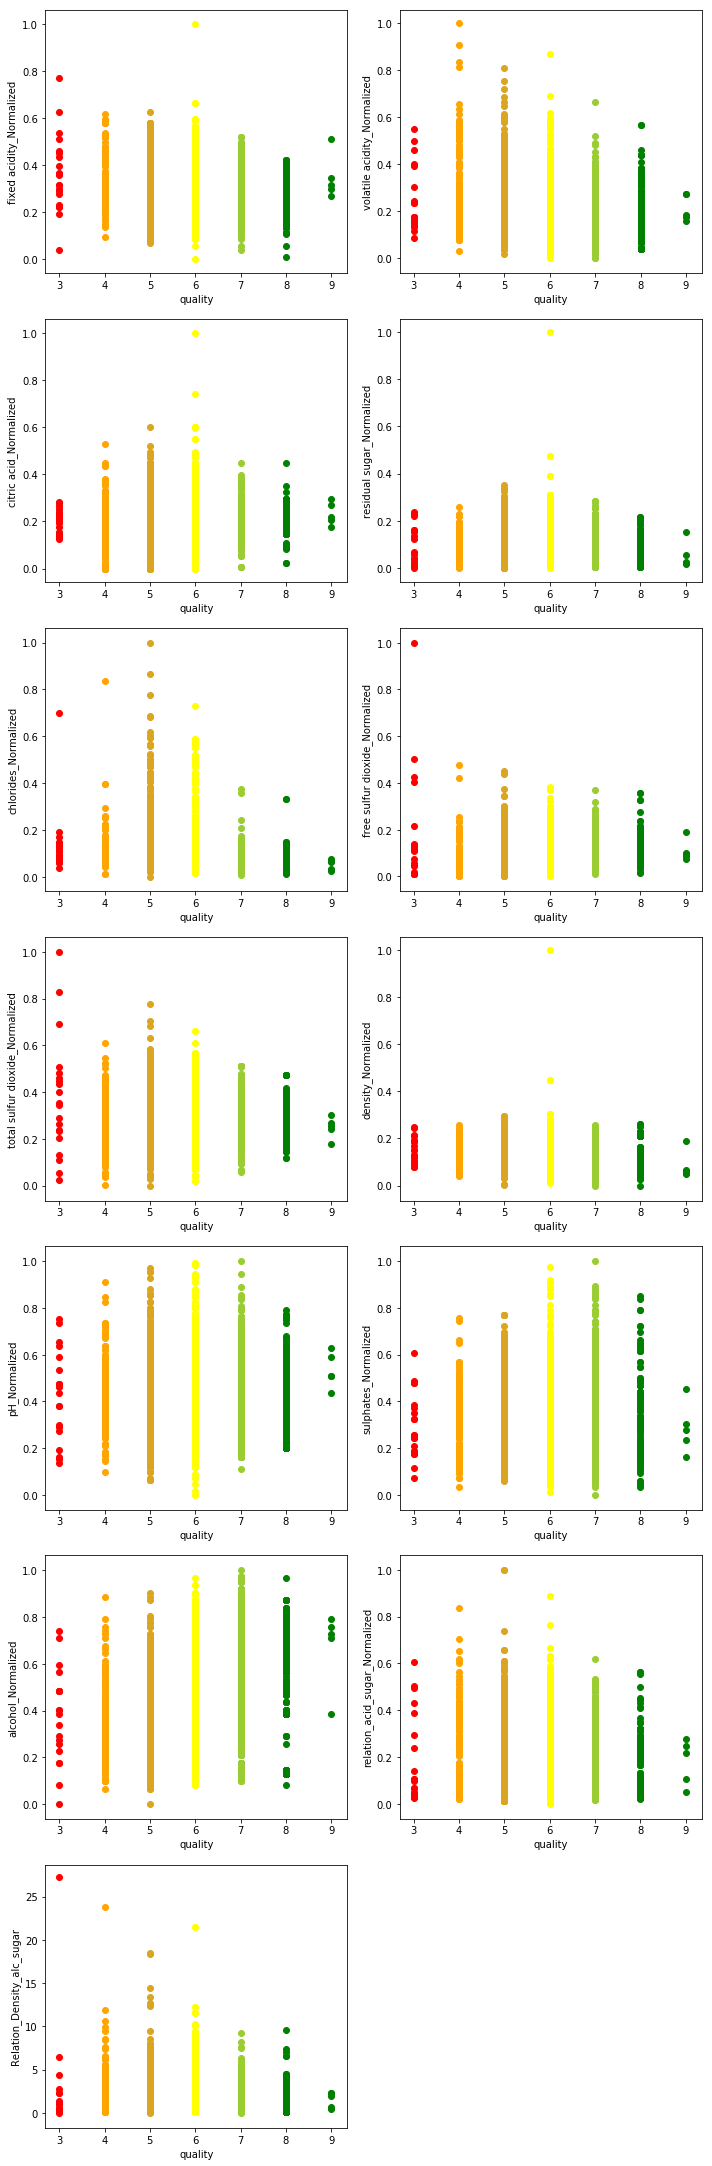

In [36]:
plt.figure(8, (10,30))
i = 1
mainColumn = 'quality'
for column in Normalized_to_0_1:
    if (column != 'quality') & (column != 'quality class') & (column != mainColumn):
        plt.subplot(7,2,i)
        i += 1
        plt.tight_layout()
        plt.xlabel(mainColumn)
        plt.ylabel(column)
        for name, group in Normalized_to_0_1.groupby('quality'):
            if name == 3:
                color = 'red'
            elif name == 4:
                color = 'orange'
            elif name == 5:
                color = 'goldenrod'
            elif name == 6:
                color = 'yellow'
            elif name == 7:
                color = 'yellowgreen'
            else:
                color = 'green'
            plt.scatter(group[mainColumn], group[column], c=color, label=name)
plt.show()

In [38]:
print(__doc__)



independent = pd.DataFrame()
independent['density'] = white['density']
independent['alcohol'] = white['alcohol']
independent['residual sugar'] = white['residual sugar']

dependent = pd.DataFrame()
dependent['quality'] = white['quality']

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(independent, dependent)

# The coefficients
print('Coefficients: \n', regr.coef_)


# Plot outputs
#plt.scatter(diabetes_X_test, diabetes_y_test,  color='black')
#plt.plot(diabetes_X_test, diabetes_y_pred, color='blue', linewidth=3)

#plt.xticks(())
#plt.yticks(())

#plt.show()

Automatically created module for IPython interactive environment
Coefficients: 
 [[-8.78858858e+01  2.45871189e-01  5.33237258e-02]]


In [40]:
independent_full = white_data = white.drop(['quality', 'quality class'], axis = 1)

In [41]:
independent_full = sm.add_constant(independent_full) ## let's add an intercept (beta_0) to our model

# Note the difference in argument order
model = sm.OLS(dependent, independent_full).fit() ## sm.OLS(output, input)
predictions = model.predict(independent_full)

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.286
Model:                            OLS   Adj. R-squared:                  0.284
Method:                 Least Squares   F-statistic:                     162.8
Date:                Sat, 10 Nov 2018   Prob (F-statistic):               0.00
Time:                        18:26:16   Log-Likelihood:                -5530.5
No. Observations:                4898   AIC:                         1.109e+04
Df Residuals:                    4885   BIC:                         1.117e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  143.3856     18.802      7.626      0.000     106.525     180.246
fixed acidity            0.0787      0.021      3.752      0.000       0.038       0.120
volatile acidity        -1.9019      0.114    -16.720      0.000      -2.125      -1.679
citric acid              0.0474      0.096      0.496      0.620      -0.140       0.235
residual sugar           0.0646      0.008      7.873      0.000       0.048       0.081
chlorides               -0.3273      0.545     -0.600      0.548      -1.396       0.742
free sulfur dioxide      0.0037      0.001      4.444      0.000       0.002       0.005
total sulfur dioxide    -0.0006      0.000     -1.513      0.130      -0.001       0.000
density               -143.1493     19.076     -7.504      0.000    -180.546    -105.752
pH                       0.6579      0.105      6.251      0.000       0.452       0.864
sulphates                0.6160      0.100      6.150      0.000       0.420       0.812
alcohol                  0.1916      0.024      7.929      0.000       0.144       0.239
relation_acid_sugar     -0.0443      0.009     -5.138      0.000      -0.061      -0.027
==============================================================================
Omnibus:                      125.609   Durbin-Watson:                   1.617
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              284.750
Skew:                           0.092   Prob(JB):                     1.47e-62
Kurtosis:                       4.167   Cond. No.                     3.75e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.75e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# White vs Red

### SVM

In [73]:
clf = svm.SVC(gamma=0.001,
              decision_function_shape='ovo', class_weight='balanced')

In [76]:
cross_val = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

In [77]:
parameters = {'C': np.arange(0.1, 2, 0.1)}

In [92]:
grid_search_estimator = GridSearchCV(clf, 
                                     parameters, scoring='accuracy', cv=cross_val)

In [93]:
grid_search_estimator.fit(white_red_data,white_red['type'])

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=42, shuffle=True),
       error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovo', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3,
       1.4, 1.5, 1.6, 1.7, 1.8, 1.9])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [94]:
print("best score is {} with params {}".format(grid_search_estimator.best_score_, grid_search_estimator.best_params_))

results = grid_search_estimator.cv_results_

for i in range(len(results['params'])):
    print("{}, {}".format(results['params'][i], results['mean_test_score'][i]))

best score is 0.9432045559488995 with params {'C': 1.9000000000000001}
{'C': 0.1}, 0.9211943974141912
{'C': 0.2}, 0.9244266584577497
{'C': 0.30000000000000004}, 0.9293520086193627
{'C': 0.4}, 0.9325842696629213
{'C': 0.5}, 0.9356626135139295
{'C': 0.6}, 0.936586116669232
{'C': 0.7000000000000001}, 0.9379713714021857
{'C': 0.8}, 0.9392027089425888
{'C': 0.9}, 0.9395105433276897
{'C': 1.0}, 0.9405879636755425
{'C': 1.1}, 0.9404340464829921
{'C': 1.2000000000000002}, 0.941511466830845
{'C': 1.3000000000000003}, 0.9418193012159458
{'C': 1.4000000000000001}, 0.9422810527935971
{'C': 1.5000000000000002}, 0.9422810527935971
{'C': 1.6}, 0.9422810527935971
{'C': 1.7000000000000002}, 0.9427428043712482
{'C': 1.8000000000000003}, 0.9428967215637987
{'C': 1.9000000000000001}, 0.9432045559488995


In [95]:
grid_search_estimator = GridSearchCV(clf, 
                                     parameters, scoring='f1', cv=cross_val)

In [115]:
grid_search_estimator.fit(white_red_data,white_red_target)

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=42, shuffle=True),
       error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovo', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3,
       1.4, 1.5, 1.6, 1.7, 1.8, 1.9])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='f1', verbose=0)

In [116]:
print("best score is {} with params {}".format(grid_search_estimator.best_score_, grid_search_estimator.best_params_))

results = grid_search_estimator.cv_results_

for i in range(len(results['params'])):
    print("{}, {}".format(results['params'][i], results['mean_test_score'][i]))

best score is 0.962090766841072 with params {'C': 1.9000000000000001}
{'C': 0.1}, 0.9477267533391632
{'C': 0.2}, 0.9498008522874195
{'C': 0.30000000000000004}, 0.953084845036765
{'C': 0.4}, 0.9551961404728435
{'C': 0.5}, 0.9571605371448159
{'C': 0.6}, 0.9578441442000436
{'C': 0.7000000000000001}, 0.9586527864504947
{'C': 0.8}, 0.9594210826719166
{'C': 0.9}, 0.9596191047833904
{'C': 1.0}, 0.9603455601420203
{'C': 1.1}, 0.9602514248312706
{'C': 1.2000000000000002}, 0.9609789607709206
{'C': 1.3000000000000003}, 0.9611810827959681
{'C': 1.4000000000000001}, 0.9615901702897759
{'C': 1.5000000000000002}, 0.9614782796877344
{'C': 1.6}, 0.9612707911458513
{'C': 1.7000000000000002}, 0.9617757008572703
{'C': 1.8000000000000003}, 0.9618807326682184
{'C': 1.9000000000000001}, 0.962090766841072


In [119]:
### Results above are for white

In [120]:
grid_search_estimator.fit(white_red_data,white_red_target)

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=42, shuffle=True),
       error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovo', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3,
       1.4, 1.5, 1.6, 1.7, 1.8, 1.9])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='f1', verbose=0)

In [121]:
print("best score is {} with params {}".format(grid_search_estimator.best_score_, grid_search_estimator.best_params_))

results = grid_search_estimator.cv_results_

for i in range(len(results['params'])):
    print("{}, {}".format(results['params'][i], results['mean_test_score'][i]))

best score is 0.8867869221413102 with params {'C': 1.9000000000000001}
{'C': 0.1}, 0.8407124085463696
{'C': 0.2}, 0.8470309693267898
{'C': 0.30000000000000004}, 0.8568999224474874
{'C': 0.4}, 0.8637939377041272
{'C': 0.5}, 0.8707774735708769
{'C': 0.6}, 0.8729100554002378
{'C': 0.7000000000000001}, 0.8758416516404487
{'C': 0.8}, 0.8787800289627222
{'C': 0.9}, 0.8794664140307147
{'C': 1.0}, 0.8815541879654819
{'C': 1.1}, 0.8811758693994272
{'C': 1.2000000000000002}, 0.883247410428488
{'C': 1.3000000000000003}, 0.8838970344363896
{'C': 1.4000000000000001}, 0.8848658483281722
{'C': 1.5000000000000002}, 0.8849103058742208
{'C': 1.6}, 0.8849959741294473
{'C': 1.7000000000000002}, 0.8859260445857152
{'C': 1.8000000000000003}, 0.8862115797208138
{'C': 1.9000000000000001}, 0.8867869221413102


In [122]:
### Results above are for red